In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score

In [67]:
df = pd.read_csv("tested.csv",usecols=['Survived','Age','Fare'])

In [68]:
df.sample(10)

,Survived,Age,Fare
387,0,57.0,13.0000
266,0,NaN,0.0000
399,0,31.0,7.7333
142,0,61.0,262.3750
62,0,18.0,7.7500
310,0,18.0,8.6625
29,0,NaN,21.6792
380,0,NaN,7.7500
407,0,50.0,211.5000
95,0,25.0,7.7958


In [69]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [70]:
df['Age'].fillna(df['Age'].mean(),inplace =True)

In [71]:
df['Fare'].fillna(df['Fare'].mean(),inplace =True)

In [72]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14364\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

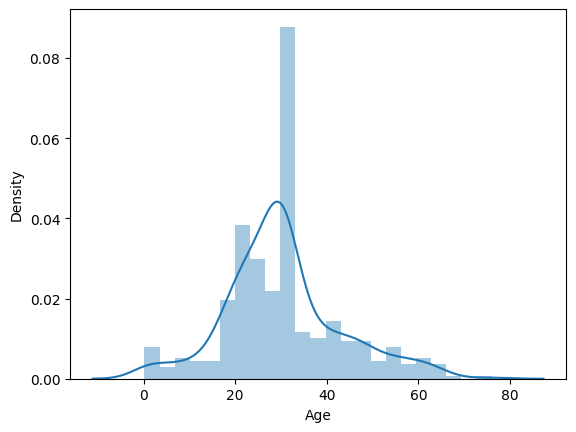

In [73]:
sns.distplot(df['Age'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14364\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

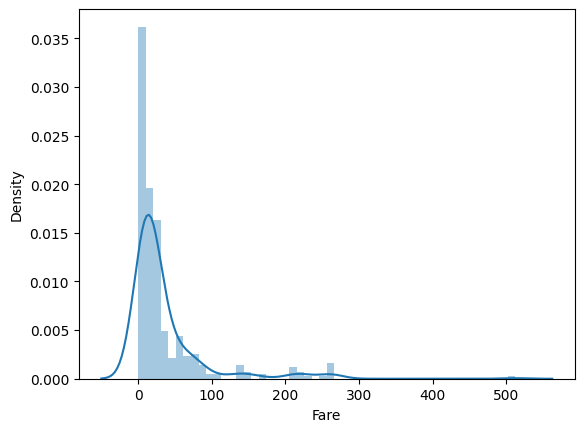

In [74]:
sns.distplot(df['Fare'])

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2)

## Without Transformation

In [77]:
lr = LogisticRegression()

In [27]:
lr.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test,y_pred)

In [33]:
accuracy

0.6071428571428571

## With Function Transformation

In [34]:
from sklearn.preprocessing import FunctionTransformer

### LOG Transformation for all input columns

In [35]:
trf = FunctionTransformer(func=np.log1p)

In [61]:
X_train_transformed = trf.fit_transform(X_train)
df2 = pd.DataFrame(X_train_transformed,columns=X_train.columns)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14364\850953070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

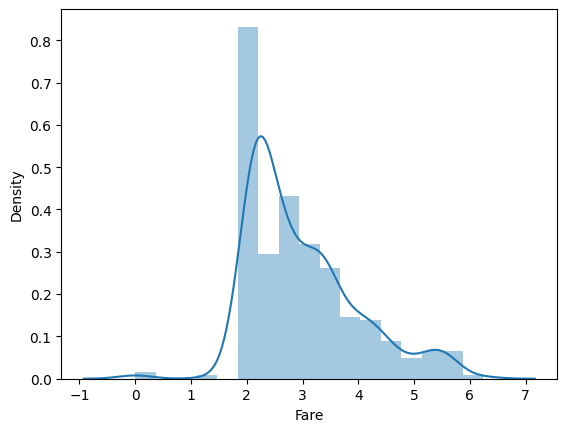

In [63]:
sns.distplot(df2['Fare'])

In [37]:
X_test_transformed = trf.transform(X_test)

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(X_train_transformed,y_train)

LogisticRegression()

In [48]:
y_pred = lr.predict(X_test_transformed)

In [49]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.5595238095238095

### only for skewed data i.e. Fare column

In [78]:
from sklearn.compose import ColumnTransformer

In [79]:
trf2 = ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')

In [80]:
X_train_transformed = trf2.fit_transform(X_train)
df_new = pd.DataFrame(X_train_transformed,columns=X_train.columns)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14364\319207729.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

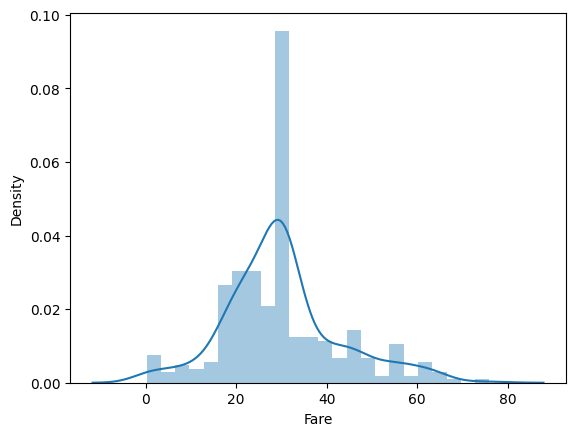

In [82]:
sns.distplot(df_new['Fare'])

In [83]:
X_test_transformed = trf2.fit_transform(X_test)

In [84]:
lr = LogisticRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)

In [85]:
accuracy = accuracy_score(y_test,y_pred)

In [86]:
accuracy

0.6904761904761905